In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LSTM
import math
from sklearn.metrics import mean_squared_error

2024-03-23 02:07:04.825794: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


[*********************100%%**********************]  1 of 1 completed


                  Open        High         Low       Close   Adj Close  \
Date                                                                     
2015-03-23  267.894989  277.296997  261.744995  266.739990  266.739990   
2015-03-24  266.576996  267.002991  244.154999  245.595001  245.595001   
2015-03-25  247.472000  249.190002  236.514999  246.197006  246.197006   
2015-03-26  246.276001  254.354004  244.904999  248.531998  248.531998   
2015-03-27  248.565994  256.811005  245.212997  247.029007  247.029007   

              Volume  
Date                  
2015-03-23  22811900  
2015-03-24  40073700  
2015-03-25  35866900  
2015-03-26  25730000  
2015-03-27  17274900  
Number of rows: 3289
Index(['Date', 'Open', 'High', 'Low', 'Close', 'Adj Close', 'Volume'], dtype='object')


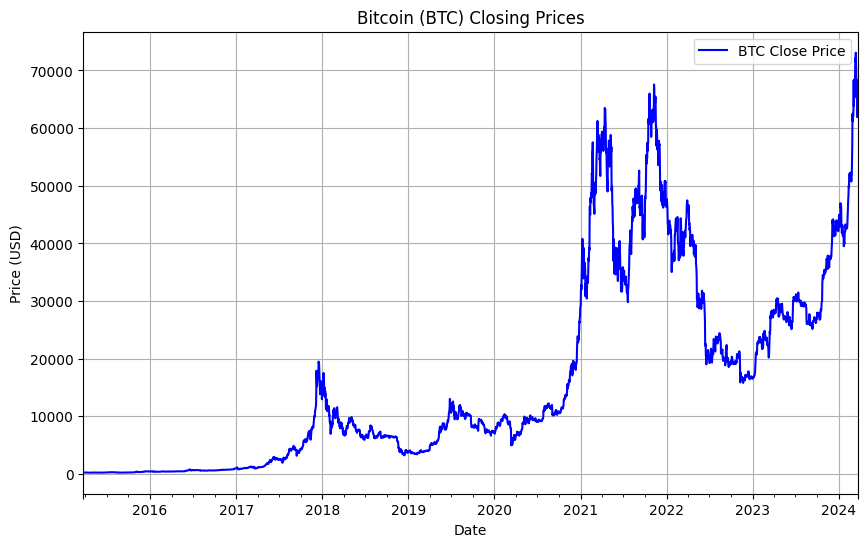

In [2]:
import yfinance as yf
import matplotlib.pyplot as plt

# Define the ticker symbol for Bitcoin (BTC)
ticker_symbol = 'BTC-USD'

# Fetch historical data for Bitcoin from Yahoo Finance
btc_data = yf.download(ticker_symbol, period='9y')  # Fetch data for the past year

# Print the first few rows of the DataFrame
print(btc_data.head())

num_rows, num_cols = btc_data.shape
print("Number of rows:", num_rows)

bitcoin_data = pd.read_csv('bitcoin_data.csv')
print(bitcoin_data.columns)

# Plot the closing prices of Bitcoin
plt.figure(figsize=(10, 6))
btc_data['Close'].plot(label='BTC Close Price', color='blue')
plt.title('Bitcoin (BTC) Closing Prices')
plt.xlabel('Date')
plt.ylabel('Price (USD)')
plt.legend()
plt.grid(True)
plt.show()

In [3]:
# Data Processing
scaler = MinMaxScaler()
btc_data = scaler.fit_transform(np.array(btc_data).reshape(-1,1))
btc_data.shape

(19734, 1)

In [4]:
# Split the Training and Testing Data
train_size = int(len(btc_data)*0.65)
test_size = len(btc_data) - train_size
train_data,test_data = btc_data[0:train_size,:],btc_data[train_size:len(btc_data),:1]

In [5]:
# New function created that splits based on time step
def create_dataset(dataset, time_step = 1):
    dataX,dataY = [],[]
    for i in range(len(dataset)-time_step-1):
                   a = dataset[i:(i+time_step),0]
                   dataX.append(a)
                   dataY.append(dataset[i + time_step,0])
    return np.array(dataX),np.array(dataY)

In [6]:
# calling the create dataset function to split the data into
# input output datasets with time step 100
time_step = 100
X_train,Y_train =  create_dataset(train_data,time_step)
X_test,Y_test =  create_dataset(test_data,time_step)

In [7]:
# checking values
print(X_train.shape)
print(X_train)
print(X_test.shape)
print(Y_test.shape)

(12726, 100)
[[1.94684413e-10 2.21473208e-10 1.77161463e-10 ... 1.54657997e-10
  1.27213884e-10 1.29513259e-10]
 [2.21473208e-10 1.77161463e-10 1.91393518e-10 ... 1.27213884e-10
  1.29513259e-10 1.29513259e-10]
 [1.77161463e-10 1.91393518e-10 1.91393518e-10 ... 1.29513259e-10
  1.29513259e-10 8.57235003e-05]
 ...
 [1.08718974e-07 1.08718974e-07 2.27886192e-01 ... 9.22314514e-08
  1.71683548e-01 9.22148678e-08]
 [1.08718974e-07 2.27886192e-01 1.08690737e-07 ... 1.71683548e-01
  9.22148678e-08 9.22148678e-08]
 [2.27886192e-01 1.08690737e-07 1.08690737e-07 ... 9.22148678e-08
  9.22148678e-08 8.31060853e-08]]
(6806, 100)
(6806,)


In [12]:
# Creating and Fitting LSTM Model
model = Sequential()
model.add(LSTM(50,return_sequences = True,input_shape = (X_train.shape[1],1)))
model.add(LSTM(50,return_sequences = True))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(loss = 'mean_squared_error',optimizer = 'adam')

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ (None, 100, 50)        │        10,400 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ (None, 100, 50)        │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ (None, 50)             │        20,200 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            51 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 50,851 (198.64 KB)

 Trainable params: 50,851 (198.64 KB)

 Non-trainable params: 0 (0.00 B)